In [282]:
import pandas as pd
import platform
import matplotlib.pyplot as plt

In [283]:
# csv 폴더 안의 card 폴더 안의 오프라인.csv 로드
# 한글이 있는 파일이므로 UnicodeDecodeError 발생 가능
# CP949 또는 euc-kr 이용해 인코딩
offline = pd.read_csv('../csv/card/오프라인.csv', encoding= 'cp949')

In [284]:
# 구조, 정보, 통계량 확인
offline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   crym          2648 non-null   int64  
 1   tco_btc_nm    2648 non-null   object 
 2   ma_fem_dc     2648 non-null   int64  
 3   agegrp_dc     2648 non-null   int64  
 4   tco_btc_u_ct  2648 non-null   int64  
 5   tco_btc_u_am  2648 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 124.3+ KB


In [285]:
offline.head()
# 컬럼명만으로는 어떤 데이터인지 알기 어렵다.
# 따라서 항목정의서, 설명 등을 본다. card 폴더에 항목정의서가 첨부되어 있다.
    # 항목정의서에 따르면,
    #   crym : 기준 연월
    #   tco_btc_nm : 유통 업종(백화점, 할인점, 슈퍼마켓, 편의점)
    #   성별(ma_fem_dc)은 남자: 1, 여자: 2, 남녀무관: 9, 결측치: - 로 표기했다.
    #   agegrp_dc : 연령대(10세 단위)
    #   tco_btc_u_ct : 이용 건수
    #   tco_btc_u_am : 이용 금액

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


---

## 연습
1. 컬럼명 변경
    - 항목정의서의 컬럼 설명을 기준으로 컬럼명 변경
2. 결측치가 존재하는가?
    - non-null count를 기준으로 확인
    - 성별 컬럼에서 '-', 9 데이터 존재 여부 확인
3. 기준 연월의 데이터를 시계열 데이터로 변환
4. 남, 여 성별을 기준으로 연도별 건당 이용 금액의 평균이 어떠한 차이를 나타내는가?
    - 기준 연월의 시계열에서 연도를 추출하여 새로운 컬럼에 대입
    - 건당 이용금액 컬럼을 생성 (총이용금액/총이용건수)
    - 성별, 기준 연월 컬럼의 데이터로 그룹화해 건당 이용 금액의 평균을 구한다.
5. 해당 데이터를 막대 그래프로 시각화

#### 1. 컬럼명 변경

In [286]:
# 방법 1
# 컬럼이 많을 때는 이 방법이 더 효율적
# 항목정의서 파일 로드
# col_info = pd.read_excel( '../csv/card/(수정)(항목정의서)유통+업종+카드소비트랜드+데이터_20211101.xlsx')
# offline.columns = col_info['데이터 컬럼'].to_list
# name= ... 부분 보기 싫으면 Series에서 list로 바꾸면 된다.

# 방법 2
# 컬럼이 적을 때는 이 방법이 더 효율적
offline.columns = ['기준연월', '유통업종', '성별', '연령대', '이용건수', '이용금액']
offline

,기준연월,유통업종,성별,연령대,이용건수,이용금액
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10
...,...,...,...,...,...,...
2643,202109,편의점,2,50,844081,6.283353e+09
2644,202109,편의점,2,60,243768,1.997442e+09
2645,202109,편의점,2,70,40523,3.524203e+08
2646,202109,편의점,2,80,6349,5.333488e+07


#### 2. 결측치 확인

In [287]:
# non-null count 기준으로 확인
offline.info()
# 성별 컬럼의 type이 int이므로, 문자인 '-'는 해당 컬럼에 없다는 걸 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준연월    2648 non-null   int64  
 1   유통업종    2648 non-null   object 
 2   성별      2648 non-null   int64  
 3   연령대     2648 non-null   int64  
 4   이용건수    2648 non-null   int64  
 5   이용금액    2648 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 124.3+ KB


<span style='color:#ffd33d'>< 성별 컬럼 -, 9 데이터 확인 >

In [288]:
# 방법 1
# offline['성별'].isin(['-', '9', 9]).sum()

# 방법 2
# any()는 'or'의 의미이디. True가 하나라도 있으면 True, 없으면 False
# offline['성별'].isin(['-', '9', 9]).any()

# 방법 3
# all()은 'and'의 의미이다. False가 하나라도 있으면 False, 없으면 True
# offline['성별'].isin(['-', '9', 9]).all()

# 방법 4
# offline['성별'].value_counts()

# 방법 5
# 유일한 데이터를 출력
offline['성별'].unique()

array([1, 2])

#### 3. 기준 연월의 데이터를 시계열 데이터로 변환

In [289]:
# 방법 1. pd.to_datetime()  # format 필수
offline['기준연월'] = pd.to_datetime( offline['기준연월'], format= '%Y%m' )

offline['기준연월']

0      2019-01-01
1      2019-01-01
2      2019-01-01
3      2019-01-01
4      2019-01-01
          ...    
2643   2021-09-01
2644   2021-09-01
2645   2021-09-01
2646   2021-09-01
2647   2021-09-01
Name: 기준연월, Length: 2648, dtype: datetime64[ns]

In [290]:
# 방법 2. datetime.datetime.strptime()
# from datetime import datetime

In [291]:
# offline['기준연월'].map(
#     lambda x : datetime.strptime(str(x), "%Y%m")
# )

# 또는
# offline['기준연월'].astype(str).map(
#     lambda x : datetime.strptime(x, "%Y%m")
# )

#### 4. 남, 여 성별을 기준으로 연도별 건당 이용 금액의 평균이 어떠한 차이를 나타내는가?

<span style='color:#ffd33d'>< 기준 연월의 시계열에서 연도를 추출하여 새로운 컬럼에 대입 >

In [292]:
# 방법 1. datetime 타입(= class)에서 .year을 이용해 int 타입으로 추출
# offline['기준연월']는 Series이므로 dt(데이터타입 메소드) 이용
offline['기준연월'].dt.year
# dtype: int32

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2643    2021
2644    2021
2645    2021
2646    2021
2647    2021
Name: 기준연월, Length: 2648, dtype: int32

In [293]:
# 방법 2. strftime()을 이용해 str 타입으로 추출
offline['기준연도'] = offline['기준연월'].dt.strftime('%Y')
# dtype: object

<span style='color:#ffd33d'>< 건당 이용금액 컬럼을 생성 (총이용금액/총이용건수) >

In [294]:
offline['건당이용금액'] = (offline['이용금액'] / offline['이용건수']).round(2)

offline['건당이용금액']

0         7600.00
1        51342.27
2       105100.64
3       102694.28
4        96933.30
          ...    
2643      7444.02
2644      8194.03
2645      8696.80
2646      8400.52
2647      9596.08
Name: 건당이용금액, Length: 2648, dtype: float64

<span style='color:#ffd33d'>< 성별, 기준 연월 컬럼의 데이터로 그룹화해 건당 이용 금액의 평균을 구한다. >

In [295]:
group_data = offline.groupby( ['기준연도', '성별'] ) ['건당이용금액'].mean()

group_data

기준연도  성별
2019  1     39184.349663
      2     38107.838727
2020  1     44009.589560
      2     41389.763077
2021  1     46948.320222
      2     43306.318944
Name: 건당이용금액, dtype: float64

In [296]:
# 5. 해당 데이터를 막대 그래프로 시각화
# 그래프에서 한글 깨짐 방지
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

<Axes: xlabel='기준연도,성별'>

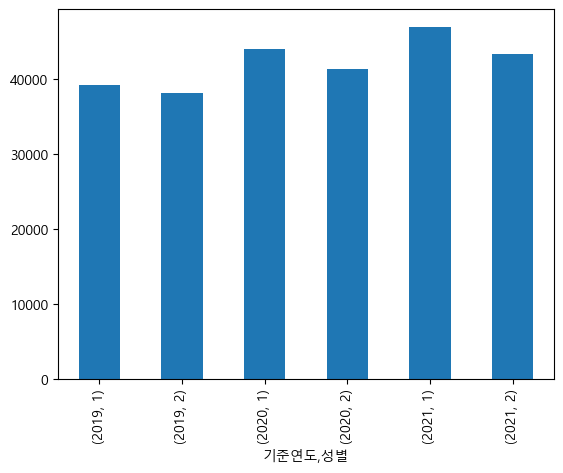

In [297]:
group_data.plot(kind='bar')

<Axes: xlabel='기준연도'>

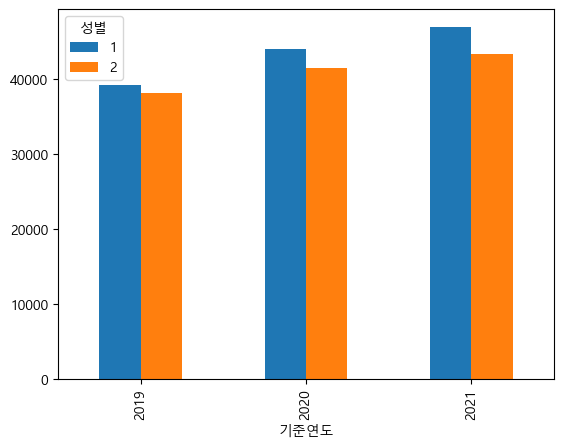

In [298]:
group_data.unstack().plot(kind='bar')

<Axes: xlabel='기준연도'>

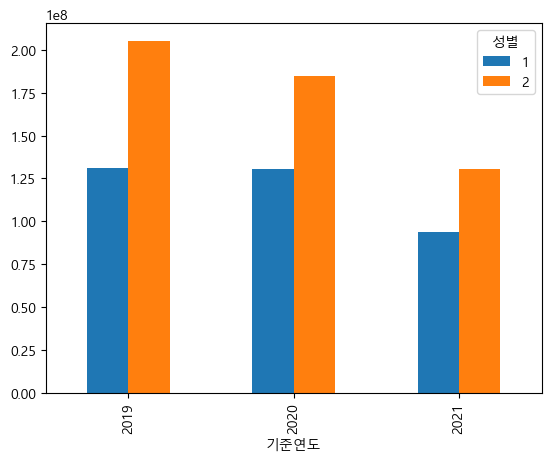

In [299]:
# 연도, 성별 이용 건수의 합계
offline.pivot_table(
    index= '기준연도',
    columns= '성별',
    values= '이용건수',
    aggfunc= 'sum'
).plot(kind= 'bar')

<Axes: xlabel='기준연월'>

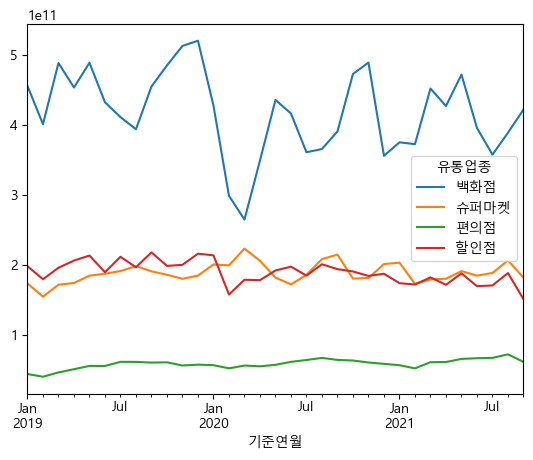

In [300]:
offline.pivot_table(
    index= '기준연월',
    columns= '유통업종',
    values= '이용금액',
    aggfunc= 'sum'
).plot()

In [301]:
# 업종, 연령대별 월별 이용 금액 합계, 총 이용 건수
group_data2 = offline.pivot_table(
    index= '기준연도',
    columns= ['유통업종', '연령대'],
    values= ['이용금액', '이용건수'],
    aggfunc= 'sum',
    fill_value= 0
)

group_data2.head()

이용건수                                                                      \
유통업종  백화점                                                                       
연령대    0   1      10       20        30        40        50       60       70   
기준연도                                                                            
2019  248  87  16124  2568645  12129370  18358415  15190895  7177883  2067178   
2020  543   0   8064  1955432   7865763  12974458  11820874  5771445  1558276   
2021  674   0   4006  1319687   5661084   9490364   8685731  4570718  1215541   

              ...      이용금액                                           \
유통업종          ...       할인점                                            
연령대       80  ...        1            10            20            30   
기준연도          ...                                                      
2019  364245  ...  376790.0  517723436.0  7.686683e+10  5.083860e+11   
2020  276340  ...       0.0  385533585.0  7.232558e+10  4.014122e+11   
2021  229363  ...       0.0  203838114.0  4.621585e+10  2.531370e+11   

                                                                            \
유통업종                                                                         
연령대             40            50            60            70            80   
기준연도                                                                         
2019  8.750478e+11  6.208178e+11  2.630315e+11  6.861733e+10  1.050563e+10   
2020  7.868664e+11  6.235294e+11  2.869037e+11  7.629363e+10  1.205602e+10   
2021  5.257694e+11  4.463248e+11  2.253179e+11  5.981914e+10  1.022406e+10   

                   
유통업종               
연령대            90  
기준연도               
2019  382617084.0  
2020  503651853.0  
2021  472245627.0  

[3 rows x 88 columns]

In [302]:
offline['연령대'].value_counts()

# 0은 정보 미수집

연령대
10    264
20    264
30    264
70    264
40    264
50    264
60    264
90    264
80    264
0     233
1      39
Name: count, dtype: int64

In [303]:
df1 = group_data2['이용건수']
df2 = group_data2['이용금액']

<Axes: xlabel='연령대'>

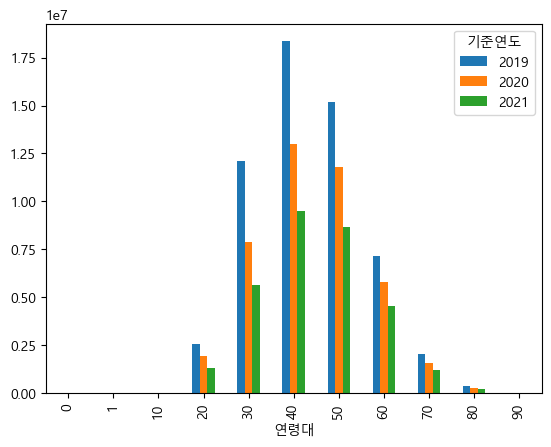

In [304]:
# 전치(T): index <-> columns
df1['백화점'].T.plot(kind= 'bar')

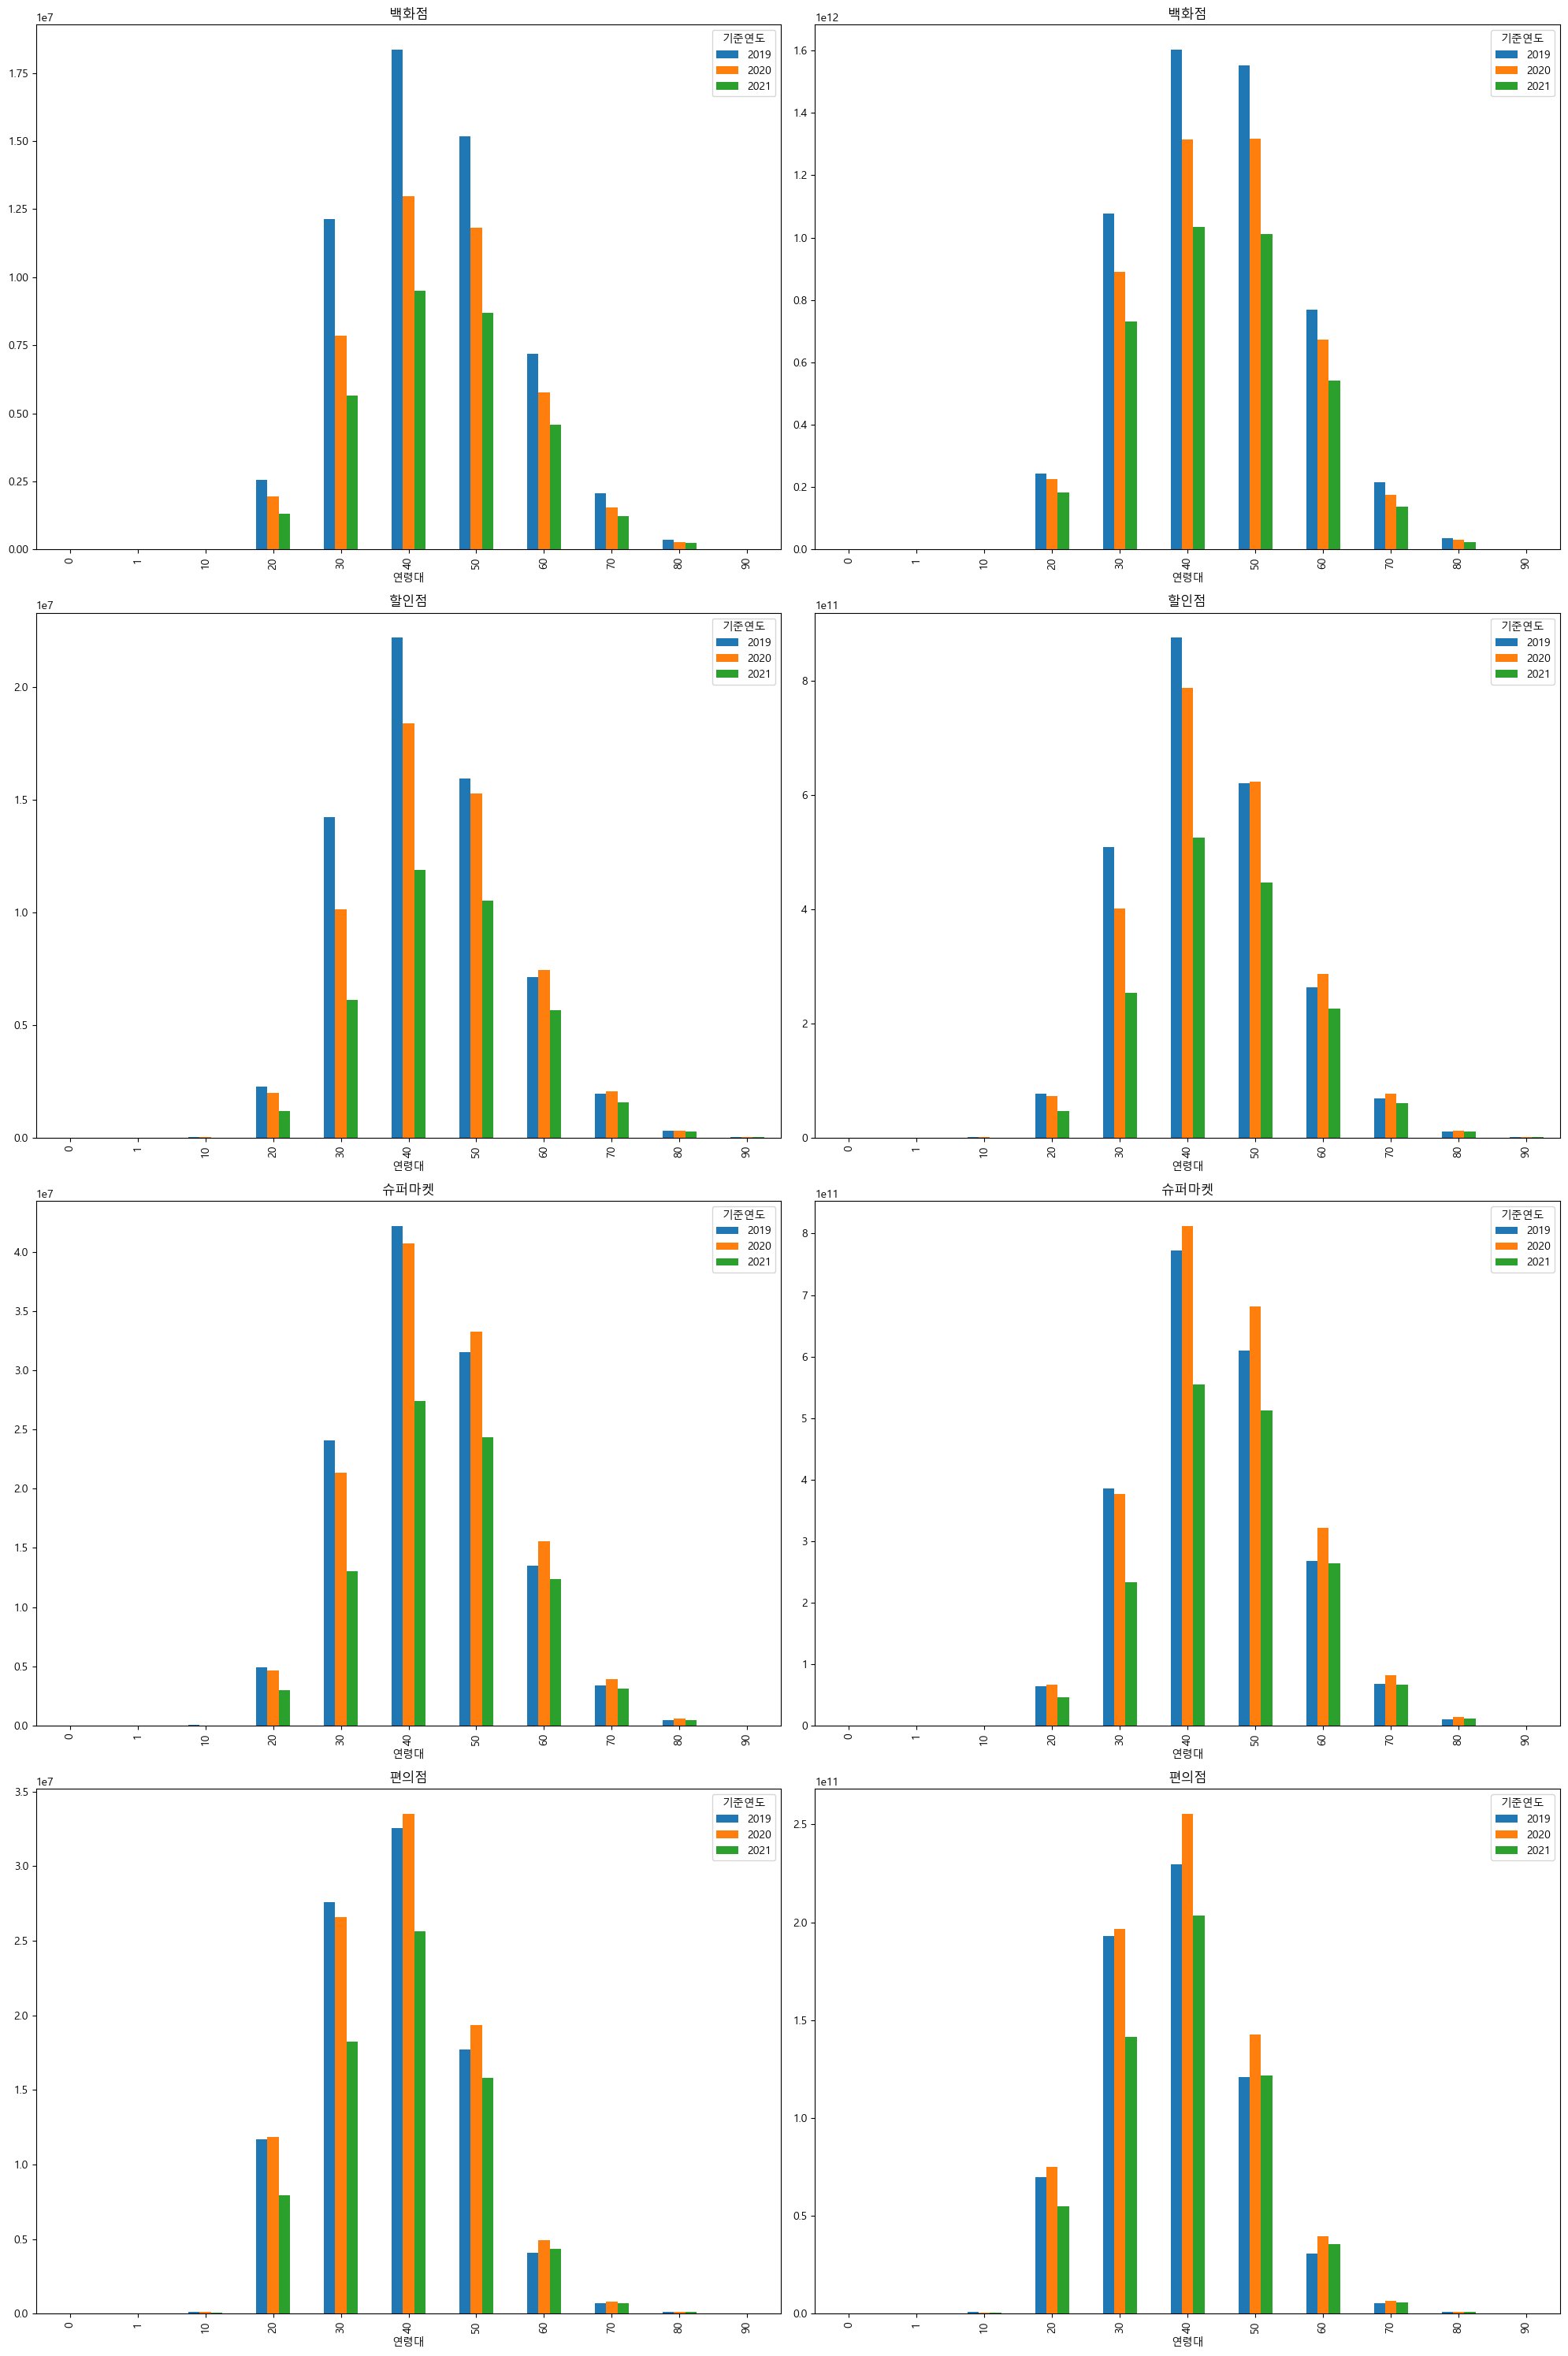

In [305]:
# 8(행4*열2)개의 공간을 생성하고, 반복 실행할 때마다 행이 1씩 증가하는 위치에 그래프를 그린다.
plt.figure(figsize=(20, 30))
# 업종의 수만큼 반복 실행
_list = offline['유통업종'].unique()
for i in range(len(_list)):
    ax1 = plt.subplot(4, 2, i*2+1) # subplot(행, 열, 위치))
    # df1의 특정 컬럼을 선택하고 전치하여 막대 그래프로 표시
    df1[_list[i]].T.plot(kind= 'bar', ax=ax1)
    # 그래프의 이름을 해당 컬럼의 이름으로 지정
    plt.title(_list[i])
    ax2 = plt.subplot(4, 2, i*2+2)

    df2[_list[i]].T.plot(kind= 'bar', ax=ax2)
    plt.title(_list[i])

plt.tight_layout()
plt.show()

---

In [306]:
offline = pd.read_csv('../csv/card/오프라인.csv', encoding='cp949')

In [307]:
# 온라인 데이터에는 업종 컬럼이 없기 때문에 한글 데이터가 없으므로 인코딩 불필요
online = pd.read_csv('../csv/card/온라인.csv')

In [308]:
offline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   crym          2648 non-null   int64  
 1   tco_btc_nm    2648 non-null   object 
 2   ma_fem_dc     2648 non-null   int64  
 3   agegrp_dc     2648 non-null   int64  
 4   tco_btc_u_ct  2648 non-null   int64  
 5   tco_btc_u_am  2648 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 124.3+ KB


In [309]:
# offline 컬럼의 이름 변경
offline.columns = ['기준연월', '유통업종', '성별', '연령대', '이용건수', '이용금액']
# online 컬럼의 이름 변경
online.columns = ['기준연월', '성별', '연령대', '이용건수', '이용금액']

In [310]:
# 오프라인, 온라인 데이터프레임의 구조를 동일하게 만들기 위해 온라인에 '유통업종' 컬럼 추가
online['유통업종'] = '온라인'
online['유통업종']

0      온라인
1      온라인
2      온라인
3      온라인
4      온라인
      ... 
646    온라인
647    온라인
648    온라인
649    온라인
650    온라인
Name: 유통업종, Length: 651, dtype: object

In [311]:
# 컬럼의 순서가 달라도 구조는 같다.
print(offline.columns)
print(online.columns)

Index(['기준연월', '유통업종', '성별', '연령대', '이용건수', '이용금액'], dtype='object')
Index(['기준연월', '성별', '연령대', '이용건수', '이용금액', '유통업종'], dtype='object')


In [312]:
# 합칠 때는 코드 순서 상 concat의 왼쪽에 있는 데이터프레임의 구조에 맞게 합쳐진다.
pd.concat(
    [ offline, online ],
    axis= 'index',
    ignore_index= True  # 인덱스 중복 방지
).head(1)

,기준연월,유통업종,성별,연령대,이용건수,이용금액
0,201901,백화점,1,1,1,7600.0


In [313]:
# 합칠 때는 코드 순서 상 concat의 왼쪽에 있는 데이터프레임의 구조에 맞게 합쳐진다.
df = pd.concat(
    [ online, offline ],
    axis= 'index',
    ignore_index= True  # 인덱스 중복 방지
)
df.head(1)

,기준연월,성별,연령대,이용건수,이용금액,유통업종
0,201901,1,1,1,110685.0,온라인


<Axes: xlabel='기준연월'>

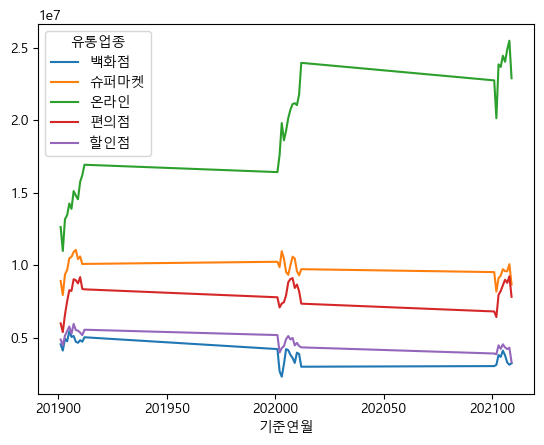

In [314]:
# 업종, 기준연월별 총이용건수의 그래프 시각화
df.pivot_table(
    index= '기준연월',
    columns= '유통업종',
    values= '이용건수',
    aggfunc= 'sum'
).plot()

In [315]:
# 그래프로 시각화할 때 기준연월을 x축으로 지정하면 숫자형으로 인식해 그래프 간격에 문제 발생
# 기준연월을 시계열 데이터로 변경
df['기준연월'] = pd.to_datetime(df['기준연월'], format= '%Y%m')
df['기준연월']

0      2019-01-01
1      2019-01-01
2      2019-01-01
3      2019-01-01
4      2019-01-01
          ...    
3294   2021-09-01
3295   2021-09-01
3296   2021-09-01
3297   2021-09-01
3298   2021-09-01
Name: 기준연월, Length: 3299, dtype: datetime64[ns]

<Axes: xlabel='기준연월'>

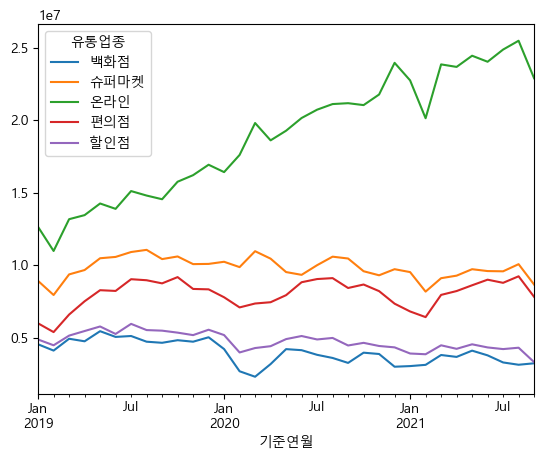

In [316]:
# 업종, 기준연월별 총이용건수의 그래프 시각화
df.pivot_table(
    index= '기준연월',
    columns= '유통업종',
    values= '이용건수',
    aggfunc= 'sum'
).plot()

- 온라인, 오프라인을 기준으로 총이용건수, 총이용금액을 그래프로 시각화하여 출력
    - 파생변수 온/오프 생성: 유통업종 데이터의 값이 온라인이라면 0, 그 외 조건이라면 1

In [317]:
# case 1: 반복문 이용
# 반복횟수: df의 길이
# 조건: 유통업종 컬럼의 value가 온라인인가?
# 반복할 때마다 빈 리스트에 0 또는 1 추가
# 만들어진 리스트를 새로운 파생변수에 추가
_list = []

# 위치를 기준으로 반복문 생성
for i in range(len(df)):
    # i에 대입되는 데이터: df의 index(행)의 위치
    # 조건식
    if df.iloc[ i, -1 ] == '온라인':
        _list.append(0)
    else:
        _list.append(1)

_list
# _list를 새로운 파생변수 온/오프에 집어넣으면 된다.

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [318]:
_list = []

# 1차원 데이터(Series)를 기준으로 반복문 생성
for name in df['유통업종']:
    # name에 대입되는 데이터: Series의 value가 하나씩 대입
    if name == '온라인':
        _list.append(0)
    else:
        _list.append(1)

_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [319]:
# while문으로 반복 실행

# 초기값
i = 0
# 빈 리스트
_list2 = []

while i < len(df):
    if df['유통업종'].iloc[i] == '온라인':
        _list2.append(0)
    else:
        _list2.append(1)
    i += 1
_list2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [320]:
_list == _list2

True

In [321]:
df['on/off'] = _list

<Axes: xlabel='기준연월'>

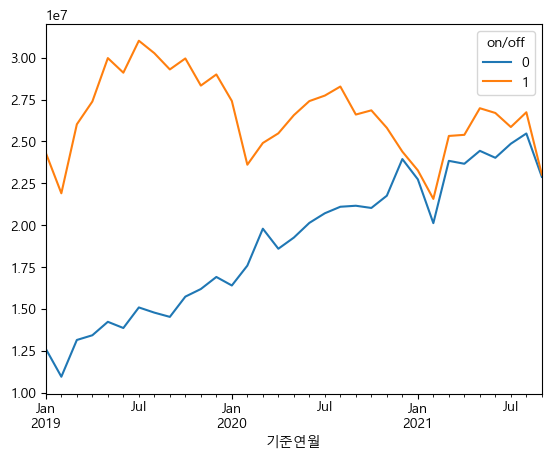

In [323]:
df.pivot_table(
    index= '기준연월',
    columns= 'on/off',
    values= '이용건수',
    aggfunc= 'sum'
).plot()

In [ ]:
# case 2: on/off2 컬럼을 생성하여 map() 데이터 추가
# lambda 에서 if문을 한 줄로 표현
    # 참인 경우 데이터 if 조건식 else 거짓인 경우의 데이터
df['on/off2'] = df['유통업종'].map(
    lambda x:  0 if x == '온라인' else 1
)

In [328]:
# sum(), any(), all(), unique() 등으로 확인
(df['on/off'] == df['on/off2']).all()

np.True_

In [333]:
# case 3: 파생변수를 미리 생성하여 기본값 설정
df['on/off3'] = 1

flag = df['유통업종'] == '온라인'  # 인덱스의 조건식

df.loc[flag, 'on/off3'] = 0

In [ ]:
# df['on/off'] == df['on/off2'] == df['on/off3']
# True/False와 df['on/off3']를 비교하는 꼴이므로 ValueError 발생

df.loc[:, 'on/off':'on/off3'].sum(axis=1).value_counts()
# 출력 결과에 1, 2 없으므로 모두 같음을 알 수 있다.

3    2648
0     651
Name: count, dtype: int64

<Axes: xlabel='기준연월'>

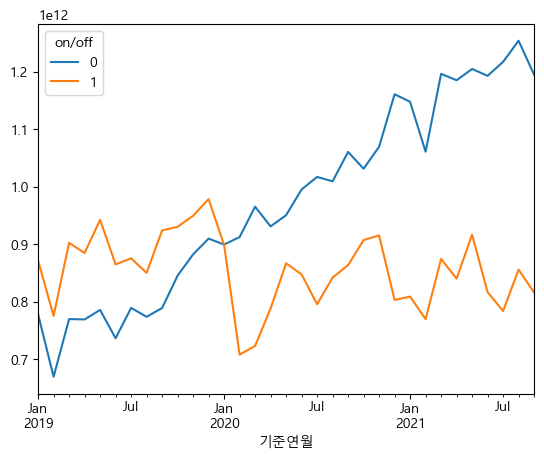

In [337]:
df.pivot_table(
    index= '기준연월',
    columns= 'on/off',
    values= '이용금액',
    aggfunc= 'sum'
).plot()

<Axes: xlabel='기준연월'>

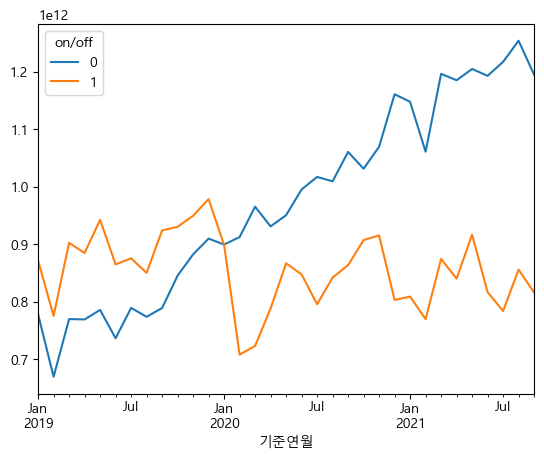

In [343]:
# groupby 함수를 이용해서 위와 같은 그래프를 생성
# 
df.groupby( ['기준연월', 'on/off'] )['이용금액'].sum().unstack().plot()